# Lindsay Foster's California Housing Price Prediction
### **Author:** Lindsay Foster
### **Date:** October 24, 2025
### **Objective:** Predict the median house price in California using available housing features.


## Introduction
This project will use the California housing dataset to predict house prices based on features such as median income, average number of rooms, and house age. I will clean the data, train a linear regression model, and explore ways to improve performance with this project.

## Import
The necessary Python libraries for this notebook are below. 

In [ ]:
# Data manipulation and analysis
# Static visualizations
import matplotlib.pyplot as plt
import pandas as pd

# Statistical visualizations built on matplotlib
import seaborn as sns

# Fetch California housing dataset
from sklearn.datasets import fetch_california_housing

# Linear regression model
from sklearn.linear_model import LinearRegression

# Performance metrics
from sklearn.metrics import mean_squared_error, r2_score

# Split dataset into training and test sets
from sklearn.model_selection import train_test_split

## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display the first 10 rows
Load the California housing dataset directly from `scikit-learn`.
- The `fetch_california_housing` function returns a dictionary-like object with the data.
- Convert it into a pandas DataFrame.
- Display just the first 10 rows using `head()`.

In [ ]:
# Load the data
import pandas as pd
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
data_frame = data.frame  # type: ignore

# Display the first 10 rows
data_frame.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


### 1.2 Check for missing values and display summary statistics

In the cell below:
1. Use `info()` to check data types and missing values.
2. Use `describe()` to see summary statistics.
3. Use `isnull().sum()` to identify missing values in each column.

In [ ]:
# Check data types and missing values
data_frame.info()

# Summary statistics for numeric columns
data_frame.describe()

# Count missing values per column
data_frame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Analysis: 

1) How many data instances (also called data records or data rows) are there? 20,640

2) How many features (also columns or attributes) are there? 9

3) What are the names of the features? ("Feature" is used most often in ML projects.) Listed Above

4) Which features are numeric? All

5) Which features are categorical (non-numeric)? None

6) Are there any missing values? How should they be handled? Should we delete a sparsely populated column? Delete an incomplete data row? Substitute with a different value? No

7) What else do you notice about the dataset? Are there any data issues? No

## Section 2. Visualize Feature Distributions
### 2.1 Create histograms, boxplots, and scatterplots

- Create histograms for all numeric features using `data_frame.hist()` with 30 bins.
- Create a boxenplots using `sns.boxenplot()`.
- Create scatter plots using `sns.pairplot()`.

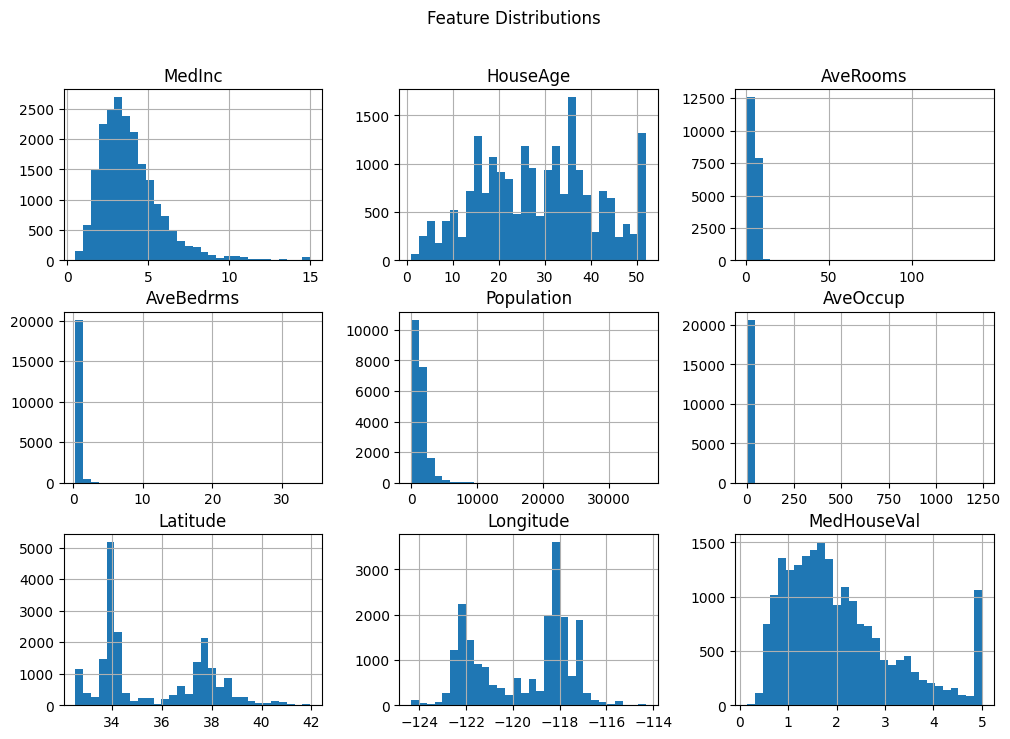

In [ ]:
import matplotlib.pyplot as plt

# Histograms for all numerical features
data_frame.hist(bins=30, figsize=(12, 8))
plt.suptitle("Feature Distributions")
plt.show()

### Generate one Boxenplot for each column (good for large datasets)

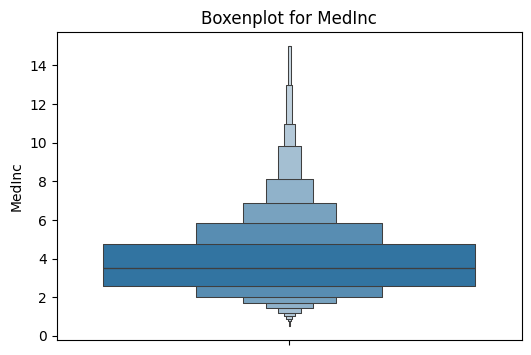

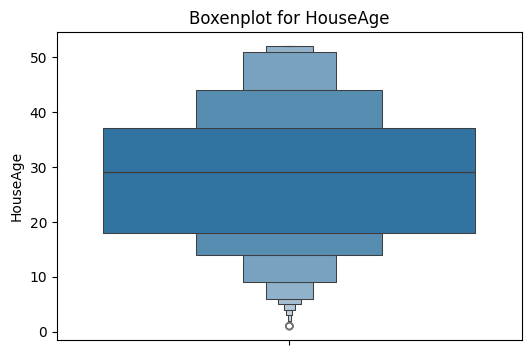

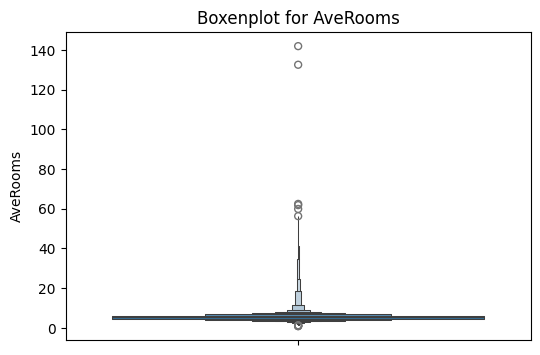

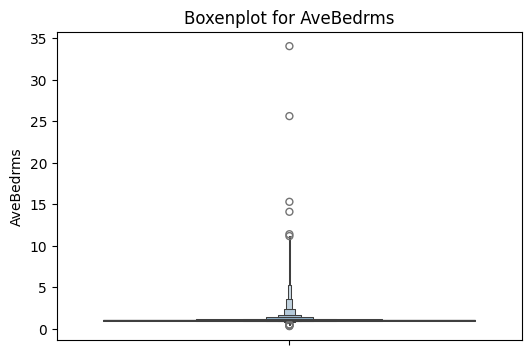

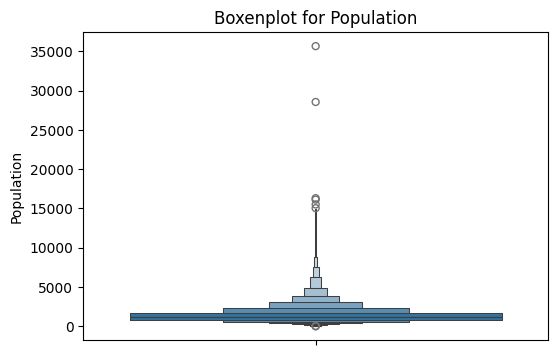

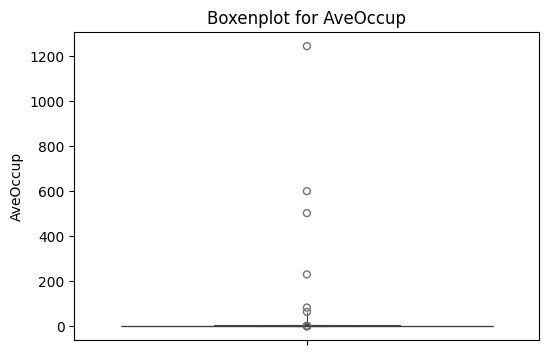

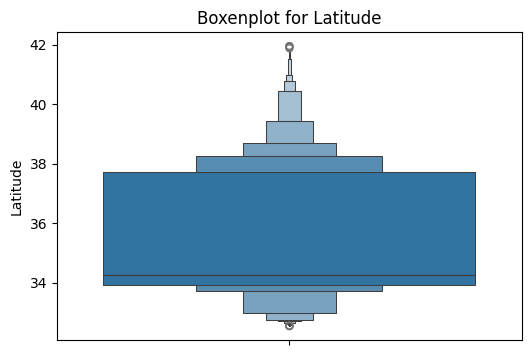

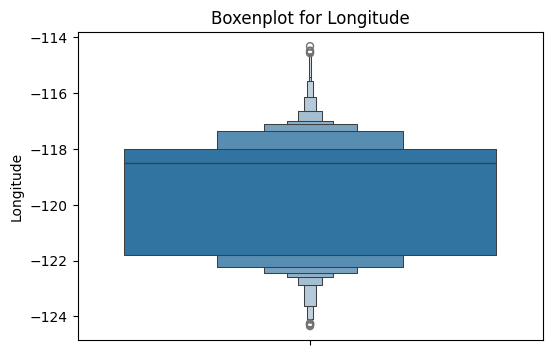

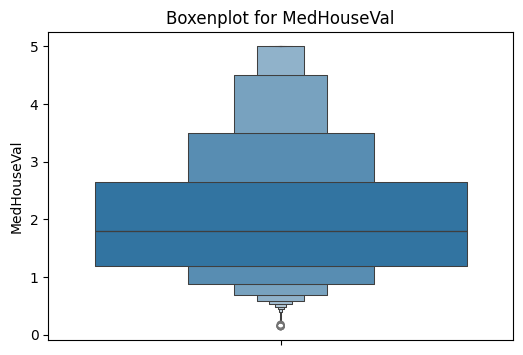

In [96]:
import seaborn as sns

# Boxenplots for each feature
for column in data_frame.columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(data=data_frame[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()

### Generate all Scatter plots

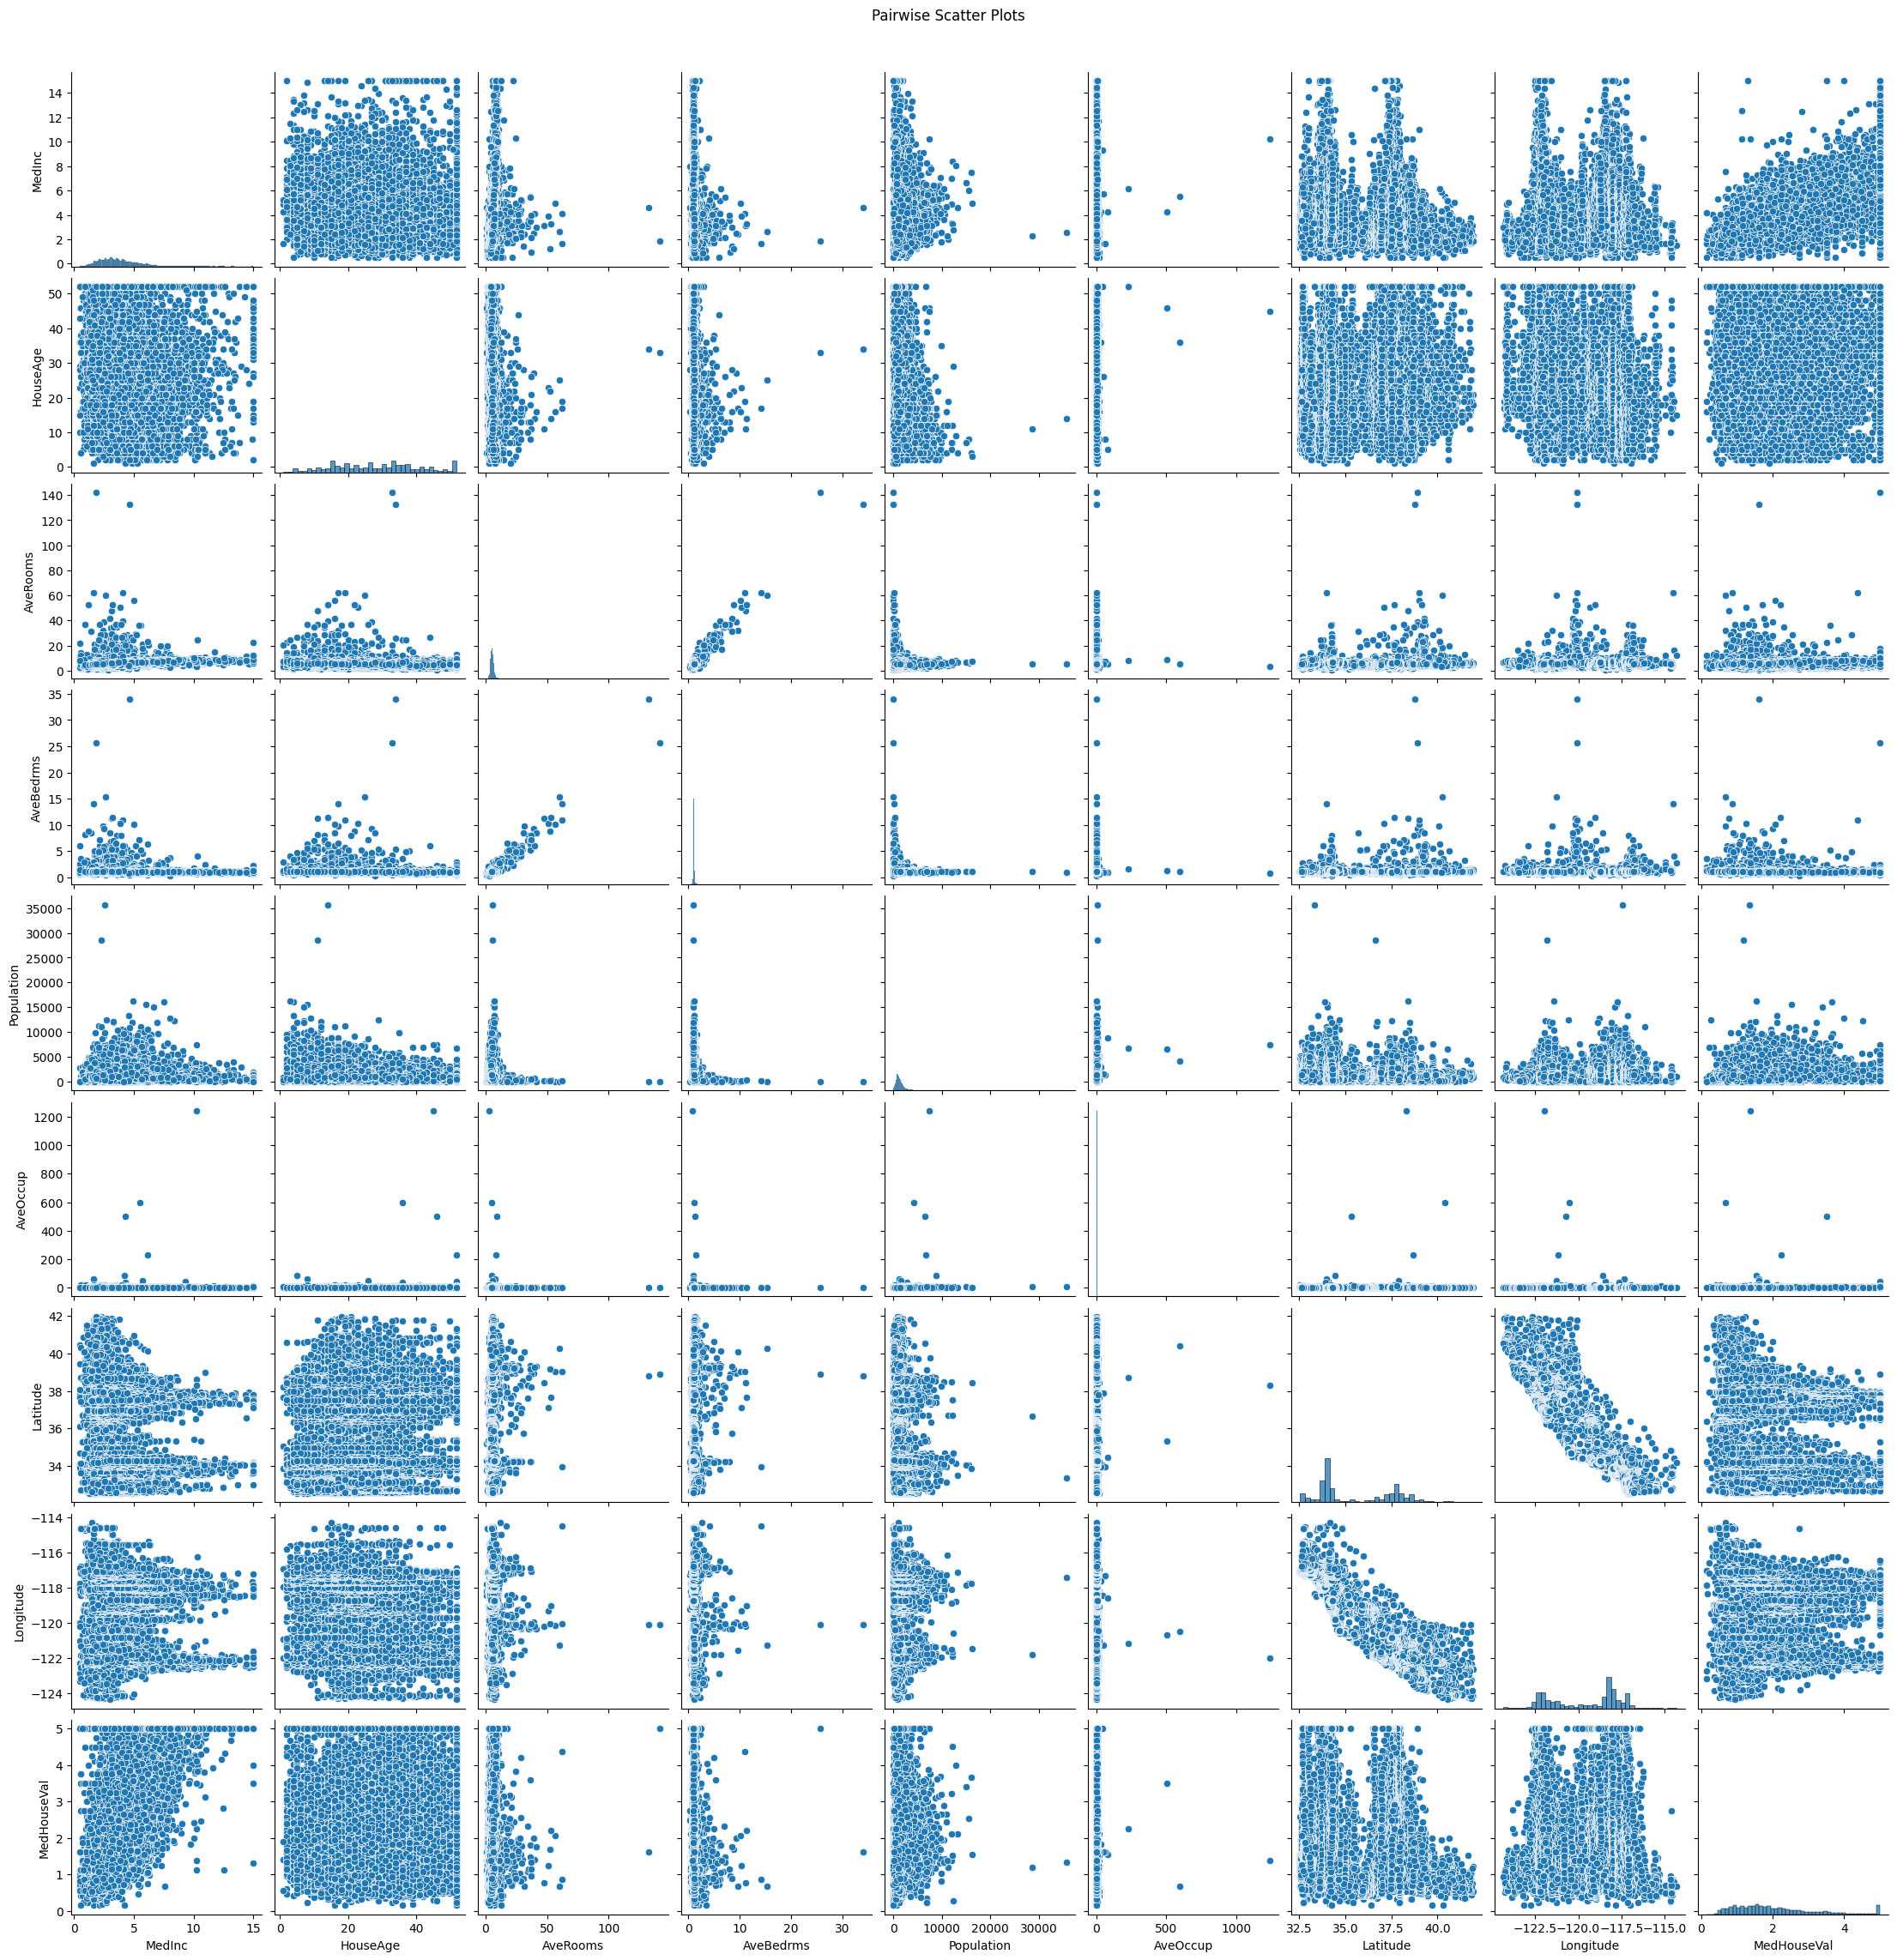

In [97]:
# Scatter plots for all numeric features
sns.pairplot(data_frame)
plt.suptitle("Pairwise Scatter Plots", y=1.02)
plt.show()

## Section 3. Feature Selection and Justification
### 3.1 Choose two input features for predicting the target

- Select `MedInc` and `AveRooms` as predictors.
- Select `MedHouseVal` as the target variable.

In the following, 
X is capitalized because it represents a matrix (consistent with mathematical notation).
y is lowercase because it represents a vector (consistent with mathematical notation).


First:
- Create a list of contributing features and the target variable
- Define the target feature string (the variable we want to predict)
- Define the input DataFrame
- Define the output DataFrame


In [98]:
# Define input features
features = ["MedInc", "AveRooms"]

# Define target variable
target = "MedHouseVal"

# Input DataFrame (X)
df_X = data_frame[features]

# Output DataFrame / target vector (y)
df_y = data_frame[target]

# Quick check
df_X.head()
df_y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

## Section 4. Train a Linear Regression Model
### 4.1 Split the data
Split the dataset into training and test sets (80% train / 20% test).

Call train_test_split() by passing in: 

- df_X – Feature matrix (input data) as a pandas DataFrame
- y – Target values as a pandas Series
- test_size – Fraction of data to use for testing (e.g., 0.1 = 10%)
- random_state – Seed value for reproducible splits

We'll get back four return values:

- X_train – Training set features (DataFrame)
- X_test – Test set features (DataFrame)
- y_train – Training set target values (Series)
- y_test – Test set target values (Series)


In [99]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

# Quick check of shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16512, 2)
X_test shape: (4128, 2)
y_train shape: (16512,)
y_test shape: (4128,)


### 4.2 Train the model
Create and fit a `LinearRegression` model.

LinearRegression – A class from sklearn.linear_model that creates a linear regression model.

model – An instance of the LinearRegression model. This object will store the learned coefficients and intercept after training.

fit() – Trains the model by finding the best-fit line for the training data using the Ordinary Least Squares (OLS) method.

X_train – The input features used to train the model.

y_train – The target values used to train the model.


Make predictions for the test set.

The model.predict() method applies this equation to the X test data to compute predicted values.

y_pred = model.predict(X_test)

y_pred contains all the predicted values for all the rows in X_test based on the linear regression model.

In [100]:
# Section 4: Train a Linear Regression Model

# Imports
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load California housing data
data = fetch_california_housing(as_frame=True)
data_frame = data.frame

# Select features and target
features = ["MedInc", "AveRooms"]
target = "MedHouseVal"
df_X = data_frame[features]
df_y = data_frame[target]

# 4.1 Split the data
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)

# 4.2 Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4.3 Make predictions
y_pred = model.predict(X_test)

# Quick look at first 10 predictions
print("Predicted values for test set:", y_pred[:10])

Training features shape: (16512, 2)
Test features shape: (4128, 2)
Predicted values for test set: [1.16230214 1.49913482 1.95573059 2.85275505 2.00167731 2.44314647
 2.56523802 2.00805478 2.53523077 3.86039686]


### 4.3 Report R^2, MAE, RMSE
Evaluate the model using R^2, MAE, and RMSE.

First:

- Coefficient of Determination (R^2) - This tells you how well the model explains the variation in the target variable. A value close to 1 means the model fits the data well; a value close to 0 means the model doesn’t explain the variation well.


In [101]:
# 4.3 Evaluate the model

import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# R² – Coefficient of Determination
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")

# MAE – Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

# RMSE – Root Mean Squared Error
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"RMSE: {rmse:.2f}")

R²: 0.46
MAE: 0.62
RMSE: 0.84
